In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import time
import random
import copy

In [69]:
cic_ddos2019_syn_train_dataset = pd.read_parquet(r'C:\Users\RACYM\Desktop\fac\M2_PFE\datasets\CIC-DDoS2019\Syn-training.parquet', engine='fastparquet')
cic_ddos2019_syn_test_dataset = pd.read_parquet(r'C:\Users\RACYM\Desktop\fac\M2_PFE\datasets\CIC-DDoS2019\Syn-testing.parquet', engine='fastparquet')

In [70]:
# how many null values are in the dataset
cic_ddos2019_syn_train_dataset.isnull().sum().sum()

np.int64(0)

In [71]:
# dropping the useless columns
# useless because their values are the same in all samples (IN SYN DATASET ONLY idk abt the others)

print(cic_ddos2019_syn_train_dataset[['Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'FIN Flag Count',
 'PSH Flag Count',
 'ECE Flag Count',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']].value_counts())  # printing all different values possible of those columns (the only value found is 0)

# all these columns have values that do no change
# so we drop them

cic_ddos2019_syn_train_dataset.drop(['Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'FIN Flag Count',
 'PSH Flag Count',
 'ECE Flag Count',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate'], axis=1, inplace=True)

cic_ddos2019_syn_test_dataset.drop(['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd URG Flags',
 'FIN Flag Count',
 'PSH Flag Count',
 'ECE Flag Count',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate'], axis=1, inplace=True)


cic_ddos2019_syn_train_dataset

Bwd PSH Flags  Fwd URG Flags  Bwd URG Flags  FIN Flag Count  PSH Flag Count  ECE Flag Count  Fwd Avg Bytes/Bulk  Fwd Avg Packets/Bulk  Fwd Avg Bulk Rate  Bwd Avg Bytes/Bulk  Bwd Avg Packets/Bulk  Bwd Avg Bulk Rate
0              0              0              0               0               0               0                   0                     0                  0                   0                     0                    70336
Name: count, dtype: int64


,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,105,2,2,12.0,12.0,6.0,6.0,6.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Syn
1,6,1,2,0,12.0,0.0,6.0,6.0,6.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Syn
2,6,55295858,8,0,48.0,0.0,6.0,6.0,6.0,0.0,...,20,1.0,0.0,1.0,1.0,18431952.0,4641289.0,22000140.0,13184826.0,Syn
3,6,49,2,0,12.0,0.0,6.0,6.0,6.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Syn
4,6,109,2,2,12.0,12.0,6.0,6.0,6.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Syn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70331,6,41018,1,1,6.0,6.0,6.0,6.0,6.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
70332,6,55275,1,1,6.0,6.0,6.0,6.0,6.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
70333,6,170,1,2,6.0,12.0,6.0,6.0,6.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
70334,6,105,1,2,6.0,12.0,6.0,6.0,6.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [72]:
# normalizing the dataset
def normalize(dataset):
    data = dataset.iloc[:, :-1]
    # data_normalized = (data - data.min()) / (data.max() - data.min())    # methode 1 of normalization
    data_normalized = (data - data.mean()) / data.std()                   # methode 2 of normalization (standard deviation)
    data_normalized['Label'] = dataset['Label']
    return data_normalized

cic_ddos2019_syn_train_dataset_normalized = normalize(cic_ddos2019_syn_train_dataset)
cic_ddos2019_syn_test_dataset_normalized = normalize(cic_ddos2019_syn_test_dataset)

In [73]:
cic_ddos2019_syn_train_dataset_normalized.isnull().sum().sum()    # returns how many values are nan in the dataset

np.int64(0)

In [74]:
# finding which columns are responsible for the nan values
nanColumns = cic_ddos2019_syn_test_dataset_normalized.columns[cic_ddos2019_syn_test_dataset_normalized.isna().any()].tolist()
nanColumns
# empty = good (they were already droped above)

[]

In [75]:
# the Label column is a string (needs to be int)
cic_ddos2019_syn_train_dataset_normalized['Label'].value_counts()

Label
Syn       43302
Benign    27034
Name: count, dtype: int64

In [76]:
# changing the Label column from string to int
cic_ddos2019_syn_train_dataset_normalized['Label'] = cic_ddos2019_syn_train_dataset_normalized['Label'].map({'Benign': 0, 'Syn': 1})
cic_ddos2019_syn_test_dataset_normalized['Label'] = cic_ddos2019_syn_test_dataset_normalized['Label'].map({'Benign': 0, 'Syn': 1})

print(cic_ddos2019_syn_train_dataset_normalized['Label'].value_counts())
cic_ddos2019_syn_train_dataset_normalized

Label
1    43302
0    27034
Name: count, dtype: int64


,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,-0.378031,-0.960097,-0.222082,-0.085710,-0.151315,-0.039596,-0.243,-0.155154,-0.268377,-0.230531,...,-0.343788,-0.207878,-0.252774,-0.271568,-0.097378,-0.811730,-0.654106,-0.884715,-0.671432,1
1,-0.378031,-0.960100,-0.222082,-0.122046,-0.151315,-0.039732,-0.243,-0.155154,-0.268377,-0.230531,...,-0.343788,-0.207878,-0.252774,-0.271568,-0.097378,-0.811730,-0.654106,-0.884715,-0.671432,1
2,-0.378031,0.777728,-0.040181,-0.122046,-0.138028,-0.039732,-0.243,-0.155154,-0.268377,-0.230531,...,-0.343788,-0.207876,-0.252774,-0.271567,-0.097376,0.796003,0.619636,0.757754,0.576582,1
3,-0.378031,-0.960099,-0.222082,-0.122046,-0.151315,-0.039732,-0.243,-0.155154,-0.268377,-0.230531,...,-0.343788,-0.207878,-0.252774,-0.271568,-0.097378,-0.811730,-0.654106,-0.884715,-0.671432,1
4,-0.378031,-0.960097,-0.222082,-0.085710,-0.151315,-0.039596,-0.243,-0.155154,-0.268377,-0.230531,...,-0.343788,-0.207878,-0.252774,-0.271568,-0.097378,-0.811730,-0.654106,-0.884715,-0.671432,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70331,-0.378031,-0.958811,-0.252399,-0.103878,-0.153529,-0.039664,-0.243,-0.155154,-0.268377,-0.230531,...,-0.343788,-0.207878,-0.252774,-0.271568,-0.097378,-0.811730,-0.654106,-0.884715,-0.671432,0
70332,-0.378031,-0.958363,-0.252399,-0.103878,-0.153529,-0.039664,-0.243,-0.155154,-0.268377,-0.230531,...,-0.343788,-0.207878,-0.252774,-0.271568,-0.097378,-0.811730,-0.654106,-0.884715,-0.671432,0
70333,-0.378031,-0.960095,-0.252399,-0.085710,-0.153529,-0.039596,-0.243,-0.155154,-0.268377,-0.230531,...,-0.343788,-0.207878,-0.252774,-0.271568,-0.097378,-0.811730,-0.654106,-0.884715,-0.671432,0
70334,-0.378031,-0.960097,-0.252399,-0.085710,-0.153529,-0.039596,-0.243,-0.155154,-0.268377,-0.230531,...,-0.343788,-0.207878,-0.252774,-0.271568,-0.097378,-0.811730,-0.654106,-0.884715,-0.671432,0


In [77]:
# transforming the dataset into python lists
cic_ddos2019_syn_train = cic_ddos2019_syn_train_dataset_normalized.to_numpy().tolist()
cic_ddos2019_syn_test = cic_ddos2019_syn_test_dataset_normalized.to_numpy().tolist()

sys_train = []
for i in range(len(cic_ddos2019_syn_train)-1):
    sys_train.append([cic_ddos2019_syn_train[i][:65], cic_ddos2019_syn_train[i][65]])

sys_test = []
for i in range(len(cic_ddos2019_syn_test)-1):
    sys_test.append([cic_ddos2019_syn_test[i][:65], cic_ddos2019_syn_test[i][65]])

In [78]:
# getting the min and max values of each feature (used in the mutate function)

MINs = [0 for i in range(65)]
MAXs = [0 for i in range(65)]

tracker = 0
for i in range(len(sys_train)):
    if i % 10000 == 0:
        print("progression : {} / {}".format(i, len(sys_train)))

    for j in range(65):
        if sys_train[i][0][j] < MINs[j]:
            MINs[j] = sys_train[i][0][j]
        if sys_train[i][0][j] > MAXs[j]:
            MAXs[j] = sys_train[i][0][j]

print(MINs)
print(MAXs)

progression : 0 / 70335
progression : 10000 / 70335
progression : 20000 / 70335
progression : 30000 / 70335
progression : 40000 / 70335
progression : 50000 / 70335
progression : 60000 / 70335
progression : 70000 / 70335
[-1.9504899002124778, -0.9601003739227086, -0.2523989770580362, -0.12204607030008126, -0.15574347891982057, -0.03973232590605885, -0.26338411624636776, -0.349650237450496, -0.36795674843250453, -0.2305308080181586, -0.27923523794005556, -0.43023759342094886, -0.3042676084937375, -0.25325392741183117, -0.05578699360883859, -0.18613733520281073, -0.9477210645746247, -0.9978707673316286, -0.9058793161882676, -0.021728319067465435, -0.9528632614591003, -1.0162630982797454, -0.9847817602704462, -0.8970136698259757, -0.019335653932495436, -0.5155248179049917, -0.5368043727217928, -0.5436989148192988, -0.5476727744678033, -0.3048668416638157, -0.21703061968660395, -0.2269240496025395, -0.10789338627971416, -0.17377790002672874, -0.09471685416447115, -0.4655009417848195, -0.296

# Algorithm part

In [79]:
ARRAY_SIZE = 77  # Features number
MAX_ITER = 5  # Max iterations to stop training on a given antigene
SEED = 0    # Fixed seed to use the same random numbers in different calls

# Mapping classes to integers
mapping = {"Benign": 0, "Syn": 1}
reverseMapping = {0: "Benign", 1: "Syn"}

# Mutation rate for ARBs
# todo: pretty bad implementation, structure it.
MUTATION_RATE = 0.2



class AIRS:
    """AIRS (Artificial Immune Recognition System) class
    Main class for this algorithm
    Params:
        hyper_clonal_rate (float) : Define the number of clones an ARB is allowed to produce
        clonal_rate (float) : Define the number of ressources an ARB can obtain
        class_number (int) : The number of classes (3 in this case)
        mc_init_rate (float) : Define the number of training data to be copied in memory cells
        total_num_resources (float) : The total numbers of resources to share between ARBs
        affinity_threshold_scalar  (float) : Give a cut-off value for cell replacement
        k (int) : The number of memory cells to use for classification
        test_size (float) : The percentage of global data to take as test data

    """

    def __init__(self, hyper_clonal_rate, clonal_rate, class_number, mc_init_rate,
                 total_num_resources, affinity_threshold_scalar, k, test_size):
        self.HYPER_CLONAL_RATE = hyper_clonal_rate
        self.CLONAL_RATE = clonal_rate
        self.AFFINITY_THRESHOLD = 0
        self.CLASS_NUMBER = class_number
        self.MC_INIT_RATE = mc_init_rate
        self.TOTAL_NUM_RESOURCES = total_num_resources
        self.AFFINITY_THRESHOLD_SCALAR = affinity_threshold_scalar
        self.TEST_SIZE = test_size
        self.K = k
        self.MC = None
        self.AB = None
        self.MC_initial = None
        self.MC_iterations = []


    # calculates the affinity between two vectors
    # the affinity is the euclidian distance between the two vectors
    @staticmethod
    def affinity(vector1, vector2):
        """Compute the affinity (Normalized !! distance) between two features vectors
        :param vector1: First features vector
        :param vector2: Second features vector
        :return: The affinity between the two vectors [0-1]
        """

        d = 0
        for i, j in zip(vector1, vector2):
            d += (i - j) ** 2
        euclidian_distance = math.sqrt(d)

        return euclidian_distance / (1 + euclidian_distance)
    



    # splits the dataset into 2 parts (train and test)
    # the train/split size is defined by the variable TEST_SIZE
    # def train_test_split(self):
    #     random.seed(SEED)
    #     with open("iris.data", "r") as data:
    #         content = data.readlines()
    #         ret = [([float(x.split(",")[i]) for i in range(4)], mapping[x.split(",")[4][:-1]]) for x in content]
    #         random.shuffle(ret)
    #     return ret[:int((1 - self.TEST_SIZE) * len(ret))], ret[int((1 - self.TEST_SIZE) * len(ret)):]

    def train_test_split(self):
        # return sys_train[:3000]+sys_train[-3000:], sys_test       # using the first 10000 lines of the dataset
        return sys_train, sys_test       # using the first 10000 lines of the dataset
    




    # calculates the affinity threshold
    # it does so by calculating the average affinity between all the cells in the training set
    def calculate_affinity_threshold(self):
        train_set, test_set = self.train_test_split()

        affinity_threshold = 0
        for i in range(len(train_set)):      
            for j in range(i + 1, len(train_set)):
                affinity_threshold += self.affinity(train_set[i][0], train_set[j][0])

        self.AFFINITY_THRESHOLD = affinity_threshold / (len(train_set) * (len(train_set) - 1) / 2)





    # takes a number of cells froms training_set (the number is defined by the variable MC_INIT_RATE)
    # creates a dictionary (MC) with the keys being the classes and the values being the cells
    def init_MC(self, train_set, MC):
        """ Init the memory set pool
        :param train_set: the training set
        :param MC: The memory set pool
        """
        for _ in range(int(len(train_set) * self.MC_INIT_RATE)):
            seed_cell = random.choice(train_set)
            MC[seed_cell[1]].append(Cell(vector=seed_cell[0], _class=seed_cell[1]))




    # takes the lists of ARBs (AB) and returns the ARB of a certain class with minimum ressources
    # it returns the ARB and its index in the ARB list (AB)
    def argminARB(self, AB, _class):
        """Get the ARB with the minimum amount of resources
        :param AB: The Artificial Recognition Balls set
        :param _class: the class of the ARBs
        :return: The ARB with the lower amount of resources and its index
        """
        minRes = 1.0
        ab = None
        abIndex = None
        for i in range(len(AB[_class])):
            if AB[_class][i].resources <= minRes:
                minRes = AB[_class][i].resources
                ab = AB[_class][i]
                abIndex = i
        return ab, abIndex




    # takes the ARB list (AB) and returns the ARB with the highest stimulation among a certain class
    # it returns it in Cell form (so it can be added to the memory cells pool)
    def getMcCandidate(self, AB, _class):
        """Get the higher stimulation ARB to be (eventually) added to the memory cells pool
        :param AB: The Artificial Recognition Balls set
        :param _class: the class of the ARBs
        :return: Higher stimulation ARB of the given class
        """
        maxStim = 0.0
        ab = None
        for i in range(len(AB[_class])):
            if AB[_class][i].stimulation >= maxStim:
                maxStim = AB[_class][i].stimulation
                ab = AB[_class][i]
        c = Cell(vector=ab.vector, _class=ab._class)
        c.stimulation = ab.stimulation
        return c




    def train(self):
        """Training method"""
        start = time.time()
        train_set, test_set = self.train_test_split()    # spliting the dataset and getting train_set and test_set

        # the default affinity threshold is calculated (the average affinity between all the cells in the training set)
        # self.calculate_affinity_threshold()
        self.AFFINITY_THRESHOLD = 0.8413550739697075    # calculated seperatly on small partition of dataset

        # MC and AB are dictionaries with the keys being the classes and the values being the cells
        # the dictionaries are both in this form
        # MC = {0: [], 1: [], 2: []}
        # AB = {0: [], 1: [], 2: []}
        MC = {_class: [] for _class in range(self.CLASS_NUMBER)}
        MC_initial = {_class: [] for _class in range(self.CLASS_NUMBER)}     # added this to save the initial random mc pool
        AB = {_class: [] for _class in range(self.CLASS_NUMBER)}

        # MC Initialisation
        self.init_MC(train_set, MC)
        # self.init_MC(train_set, MC_initial)
        MC_initial = copy.deepcopy(MC)           # save the initial mc pool
        self.MC_initial = MC_initial


        train_tracker = 0

        # looping every antigene with its known class form the training set
        # for antigene, _class in train_set:

        #     # progression tracker when training
        #     train_tracker += 1
        #     print(train_tracker)
        #     if train_tracker % 1000 == 0:
        #         print("progression : {} / {}   -   {}%".format(train_tracker, len(train_set), train_tracker * 100 / len(train_set)))



        #     # MC Identification
        #     mc_match = None
        #     if len(MC[_class]) == 0:
        #         # if there is no memory cell of the same class, then add it directly to the MC pool
        #         mc_match = Cell(vector=antigene, _class=_class)
        #         MC[_class].append(mc_match)
        #     else:
        #         # running through every memory cell of that class
        #         # stimulating each memory cell with the current antigene
        #         # getting the antigene with the highest stimulation as the best match (mc_match)
        #         best_stim = 0
        #         for c in MC[_class]:
        #             if c.stimulate(antigene) >= best_stim:
        #                 best_stim = c.stimulation
        #                 mc_match = c

        #     # ARB Generation
        #     AB[_class].append(ARB(vector=mc_match.vector, _class=mc_match._class))  # add the mc_match to ARBs
        #     stim = mc_match.stimulate(antigene)  # get the stimulation of the mc_match with the current antigene

        #     iterations = 0
        #     while True:
        #         iterations += 1
        #         MAX_CLONES = int(self.HYPER_CLONAL_RATE * self.CLONAL_RATE * stim)
        #         num_clones = 0
        #         while num_clones < MAX_CLONES:
        #             clone, mutated = mc_match.mutate()

        #             if mutated:
        #                 AB[_class].append(clone)
        #                 num_clones += 1

        #         # Competition for resources
        #         avgStim = sum([x.stimulate(antigene) for x in AB[_class]]) / len(AB[_class])    # getting the average stimulation for every ARB of the class with the current antigene

        #         MIN_STIM = 1.0
        #         MAX_STIM = 0.0

        #         # loops over all the ARBs of all the classes to find the Min and Max stimulations
        #         for c in AB.keys():
        #             for ab in AB.get(c):
        #                 stim = ab.stimulate(antigene)
        #                 if stim < MIN_STIM:
        #                     MIN_STIM = stim
        #                 if stim > MAX_STIM:
        #                     MAX_STIM = stim

        #         # Normalizing the resources
        #         # the resources are normalized between 0 and 1
        #         # ressource is calculated for all the ARBs as follows:
        #         # ressource = (stimulation - MIN_STIM) / (MAX_STIM - MIN_STIM) * CLONAL_RATE
        #         for c in AB.keys():
        #             for ab in AB.get(c):
        #                 ab.stimulation = (ab.stimulation - MIN_STIM) / (MAX_STIM - MIN_STIM)
        #                 ab.resources = ab.stimulation * self.CLONAL_RATE


        #         # competition for ressources
        #         # if the sum of the resources allocated to the ARBs of the class is greater than the TOTAL_NUM_RESOURCES
        #         # then we remove the ARB with the lowest resources
        #         resAlloc = sum([x.resources for x in AB[_class]])  # calcultates the sum of the resources allocated to the ARBs of the class
        #         numResAllowed = self.TOTAL_NUM_RESOURCES
        #         while resAlloc > numResAllowed:
        #             numResRemove = resAlloc - numResAllowed
        #             abRemove, abRemoveIndex = self.argminARB(AB=AB, _class=_class)  # find the ARB with the lowest resources

        #             # remove the ARB with the lowest resources
        #             if abRemove.resources <= numResRemove:
        #                 AB[_class].remove(abRemove)
        #                 resAlloc -= abRemove.resources
        #             else:
        #                 AB[_class][abRemoveIndex].resources -= numResRemove
        #                 resAlloc -= numResRemove

        #         # if the average stimulation is greater than the affinity threshold or the number of iterations is greater than MAX_ITER
        #         # then we stop the training on the current antigene
        #         if (avgStim > self.AFFINITY_THRESHOLD) or (iterations >= MAX_ITER):
        #             break

        #     mc_candidate = self.getMcCandidate(AB=AB, _class=_class)    # get the ARB with the highest stimulation of the class

        #     # comparing the stimulation of the higest stim ARB with the best match memory cell for the antigene
        #     if mc_candidate.stimulation > mc_match.stimulation:
        #         if AIRS.affinity(mc_candidate.vector, mc_match.vector) < self.AFFINITY_THRESHOLD * self.AFFINITY_THRESHOLD_SCALAR:
        #             MC[_class].remove(mc_match)      # The mc candidate replaces the mc match
        #         MC[_class].append(mc_candidate)     # Add the mc_match to MC pool

        #     self.MC_iterations.append(copy.deepcopy(MC))  # appendice

        # update the memory cell pool and the are pool
        self.MC = MC
        self.AB = AB

        # print(len(self.MC_iterations))




        # Testing
        n_correct = 0
        for ag, _class in test_set:
            if self.classify(ag) == reverseMapping[_class]:
                n_correct += 1

        # print("Execution time : {:2.4f} seconds".format(time.time() - start))
        # print("Accuracy : {:2.2f} %".format(n_correct * 100 / len(test_set)))
        return n_correct / len(test_set)




    # classify a given antigene
    # the classification is done by stimulating all the memory cells of all the classes with the antigene
    # the K memory cells with the highest stimulations are selected
    # the class of the antigene is the class with the highest number of votes
    def classify(self, antigene):
        if (self.MC is None) or (self.AB is None):
            raise Exception("AIRS must be trained first")   # if classify is called before airs has been trained -> raise an error

        vote_array = []
        # getting the stimulation of all the memory cells of all the classes with the antigene
        for c in self.MC.keys():
            for ab in self.MC.get(c):
                ab.stimulate(antigene)
                vote_array.append(ab)


        vote_array = list(sorted(vote_array, key=lambda cell: -cell.stimulation))     # sort the memory cells by their stimulations
        v = {0: 0, 1: 0}                                # dictionary to store the number of votes for each class
        self.K = min(self.K, len(vote_array))              # the number of memory cells to use for classification is the minimum between K and the number of memory cells
        
        for x in vote_array[:self.K]:                   # loop over the K memory cells with the highest stimulations
            v[x._class] += 1                            # increment the number of votes for the class of the memory cell

        maxVote = 0
        _class = 0
        for x in v.keys():
            if v[x] > maxVote:
                maxVote = v[x]
                _class = x
        return reverseMapping[_class]




class ARB:
    """ARB (Artificial Recognition Ball) class
    Args:
        vector (list) : list of features
        _class (integer) : the class of the previous features
    """

    def __init__(self, vector=None, _class=None):
        if vector is None:
            self.vector = [random.random() for _ in range(ARRAY_SIZE)]
        else:
            self.vector = vector
        self._class = _class
        self.stimulation = float('inf')
        self.resources = 0

    def __str__(self):
        return "ARB : Vector = {} | class = {} | stim = {} | res = {}".format(self.vector, self._class,
                                                                              self.stimulation, self.resources)

    def __repr__(self):
        return "ARB : Vector = {} | class = {} | stim = {} | res = {}".format(self.vector, self._class,
                                                                              self.stimulation, self.resources)

    def stimulate(self, pattern):
        self.stimulation = 1 - AIRS.affinity(vector1=pattern, vector2=self.vector)
        return self.stimulation

    def mutate(self):
        _range = 1 - self.stimulation
        mutated = False
        new_vector = []

        # hardcoded min, max values for each feature
        # min_features = [4.3, 2.0, 1.0, 0.1]
        # max_features = [7.9, 4.4, 6.9, 2.5]
        min_features = MINs
        max_features = MAXs


        for idx, v in enumerate(self.vector):
            change = random.random()
            # could have been something like min_features[idx]*(1 - some-percentage) and max_features[idx] * (1 + some-percentage)
            change_to = random.uniform(min_features[idx], max_features[idx])

            if change <= MUTATION_RATE:
                new_vector.append(change_to)
                mutated = True
            else:
                new_vector.append(v)
        return ARB(vector=new_vector, _class=self._class), mutated
    



class Cell:
    """Cell class
    Args:
        vector (list) : list of features
        _class (integer) : the class of the previous features
    """

    def __init__(self, vector=None, _class=None):
        if vector is None:
            self.vector = [random.random() for _ in range(ARRAY_SIZE)]
        else:
            self.vector = vector
        self._class = _class
        self.stimulation = float('inf')

    def __str__(self):
        return "Cell : Vector = {} | class = {} | stim = {}".format(self.vector, self._class, self.stimulation)

    def __repr__(self):
        return "Cell : Vector = {} | class = {} | stim = {}".format(self.vector, self._class, self.stimulation)

    def stimulate(self, pattern):
        self.stimulation = 1 - AIRS.affinity(vector1=pattern, vector2=self.vector)
        return self.stimulation

    def mutate(self):
        _range = 1 - self.stimulation
        mutated = False
        new_vector = []

        # hardcoded min, max values for each feature
        # min_features = [4.3, 2.0, 1.0, 0.1]
        # max_features = [7.9, 4.4, 6.9, 2.5]
        min_features = MINs
        max_features = MAXs

        for idx, v in enumerate(self.vector):
            change = random.random()
            change_to = random.uniform(min_features[idx], max_features[idx])

            if change <= MUTATION_RATE:
                new_vector.append(change_to)
                mutated = True
            else:
                new_vector.append(v)
        return Cell(vector=new_vector, _class=self._class), mutated

In [80]:
# calculating the affinity threshold value (no longer done in training)

def affinityy(vector1, vector2):
        d = 0
        for i, j in zip(vector1, vector2):
            d += (i - j) ** 2
        euclidian_distance = math.sqrt(d)
        return euclidian_distance / (1 + euclidian_distance)


train_set, test_set = sys_train[:3000] + sys_train[-3000:], sys_test

# print(train_set[0][0])


def calculate_affinity_thresholdd():
    affinity_threshold = 0
    tracker = 0
    for i in range(len(train_set)):
        tracker += 1
        if tracker % 100 == 0:
            print("progression : {} / {}".format(tracker, len(train_set)))
            
        for j in range(i + 1, len(train_set)):
            affinity_threshold += affinityy(train_set[i][0], train_set[j][0])

    return affinity_threshold / (len(train_set) * (len(train_set) - 1) / 2)

# affthreshold = (calculate_affinity_thresholdd())
# print(affthreshold)

# found result for 10000 samples ===> 0.7845960127524729
# found result for 10000 samples ===> 0.8413550739697075 adjusted dataset
# this value kept increasing as i increased the samples (might be wrong) but worked


In [83]:
airs = AIRS(hyper_clonal_rate=20, clonal_rate=0.8, class_number=2, mc_init_rate=0.1,
                total_num_resources=10, affinity_threshold_scalar=0.8, k=3, test_size=0.4)

print(airs.train())   # 0.5883002207505519
# 0.9966887417218543 on [:3000] + [-3000:] dataset
# 0.9867549668874173 on the whole dataset without training

0.9944812362030905


# Training Visualisation 

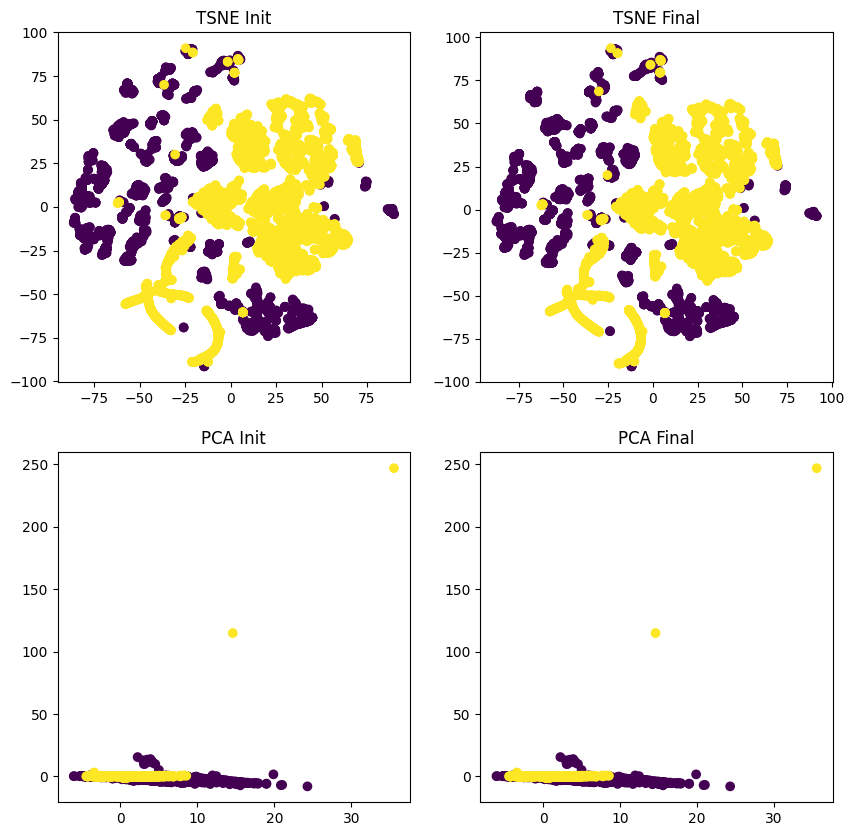

In [82]:
import matplotlib.pyplot as plt
MC_final = airs.MC
MC_initial = airs.MC_initial


X = []
Y = []
X_init = []
Y_init = []
X_final = []
Y_final = []



# getting the final MC array vectors and classes
for c in MC_final.keys():
    for cell in MC_final[c]:
        X_final.append(cell.vector)
        Y_final.append(c)
X_final_arr = np.array(X_final)
Y_final_arr = np.array(Y_final)

# getting the initial MC array vectors and classes
for c in MC_initial.keys():
    for cell in MC_initial[c]:
        X_init.append(cell.vector)
        Y_init.append(c)
X_init_arr = np.array(X_init)
Y_init_arr = np.array(Y_init)


plt.figure(figsize=(10, 10))

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# initial MC visualization using TSNE
X_embedded_TSNE_init = TSNE(n_components=2).fit_transform(X_init_arr)
plt.subplot(2, 2, 1)
plt.title("TSNE Init")
plt.scatter(X_embedded_TSNE_init[:, 0], X_embedded_TSNE_init[:, 1], c=Y_init_arr)

# initial MC visualization using PCA
X_embedded_PCA_init = PCA(n_components=2).fit_transform(X_init_arr)
plt.subplot(2, 2, 3)
plt.title("PCA Init")
plt.scatter(X_embedded_PCA_init[:, 0], X_embedded_PCA_init[:, 1], c=Y_init_arr)



# final MC visualization using TSNE
X_embedded_TSNE = TSNE(n_components=2).fit_transform(X_final_arr)
plt.subplot(2, 2, 2)
plt.title("TSNE Final")
plt.scatter(X_embedded_TSNE[:, 0], X_embedded_TSNE[:, 1], c=Y_final_arr)

# final MC visualization using PCA
X_embedded_PCA = PCA(n_components=2).fit_transform(X_final_arr)
plt.subplot(2, 2, 4)
plt.title("PCA Final")
plt.scatter(X_embedded_PCA[:, 0], X_embedded_PCA[:, 1], c=Y_final_arr)

plt.show()